# Frequent Value Imputation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/trainday37.csv',usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [8]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [9]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


Text(0, 0.5, 'Number of Houses')

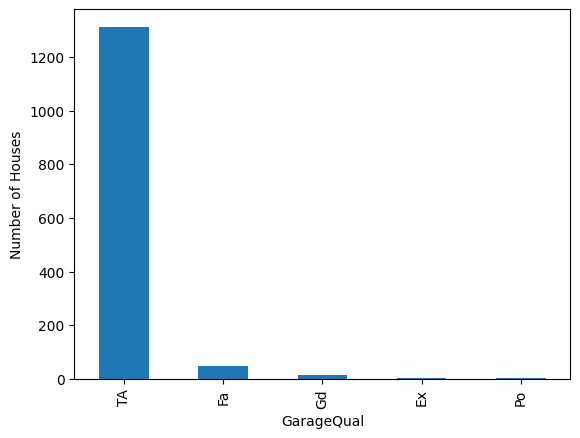

In [12]:
df['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

In [13]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

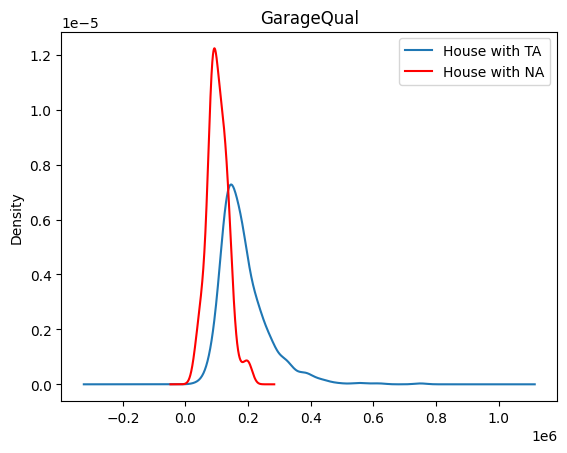

In [21]:
fig = plt.figure ()
ax = fig.add_subplot(111)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde',ax=ax,c = 'red')
lines,labels = ax.get_legend_handles_labels()
labels = ['House with TA','House with NA']
ax.legend(lines,labels,loc = 'best')
plt.title('GarageQual')

In [23]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [24]:
df['GarageQual'].fillna('TA',inplace = True)

<ipython-input-24-7bdefc4cdece>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace = True)


<Axes: xlabel='GarageQual'>

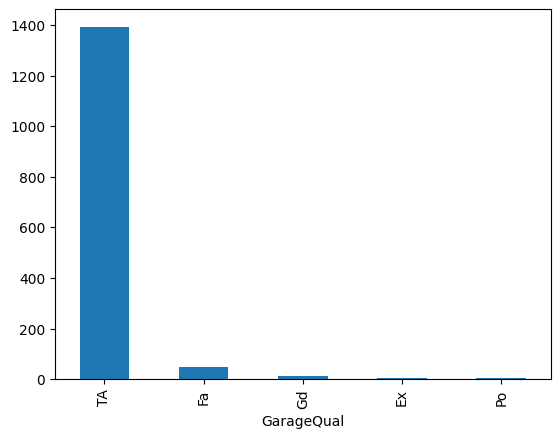

In [25]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

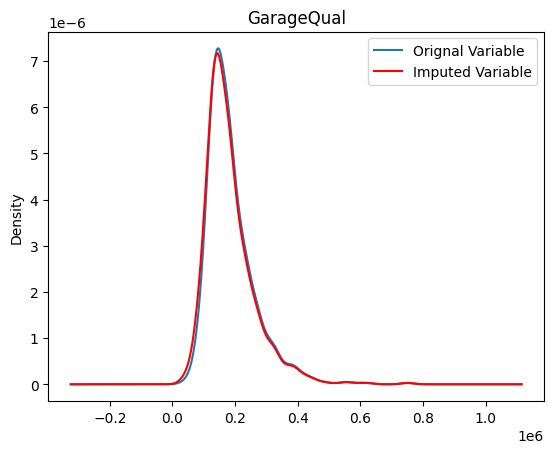

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde',ax=ax)
# Distribution of the varibale after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax , c = 'red')
lines,labels = ax.get_legend_handles_labels()
labels = ['Orignal Variable','Imputed Variable']
ax.legend(lines,labels,loc = 'best')
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

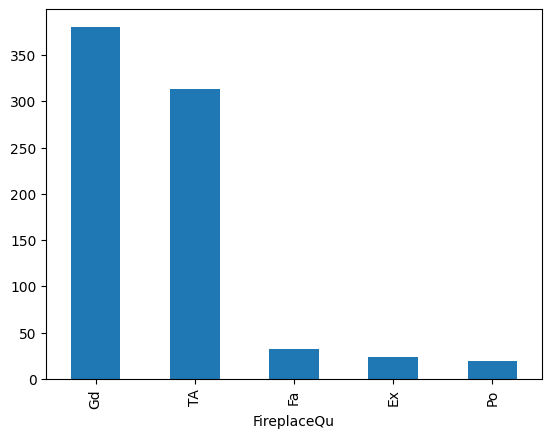

In [33]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [34]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

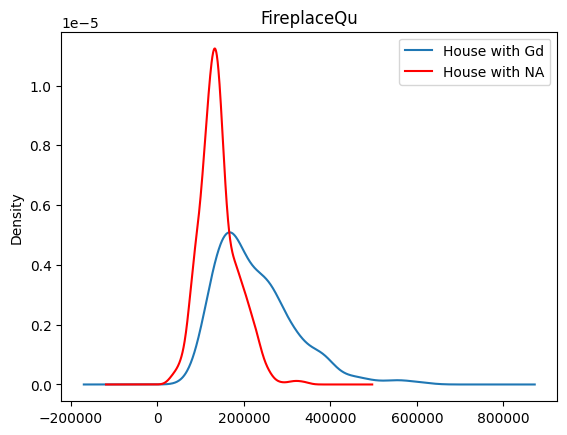

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde',ax=ax,c = 'red')
lines,labels = ax.get_legend_handles_labels()
labels = ['House with Gd','House with NA']
ax.legend(lines,labels,loc = 'best')
plt.title('FireplaceQu')

In [50]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [51]:
df['FireplaceQu'].fillna('Gd',inplace = True)

<Axes: xlabel='FireplaceQu'>

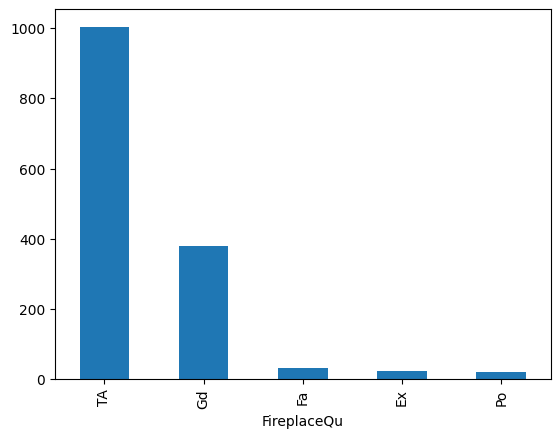

In [52]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

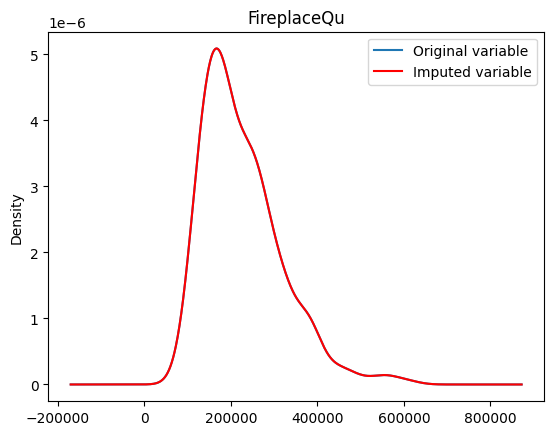

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde',ax=ax)
# Distribution of the varibale after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax , c = 'red')
lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)


In [56]:
from sklearn.impute import SimpleImputer


In [57]:
imputer = SimpleImputer(strategy='most_frequent')


In [58]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [60]:
imputer.statistics_


array(['TA', 'TA'], dtype=object)